In [ ]:
import warnings
warnings.simplefilter('ignore')

In [42]:
pip install pystan fbprophet
pip install pandas

SyntaxError: invalid syntax (1428400621.py, line 1)

In [41]:
import pandas as pd
from prophet import Prophet

In [7]:
dataset = pd.read_csv('prophet.csv')
dataset.head()

,Time Date,Product,Store,Value,Unnamed: 4
0,1012018,2667437,QLD_CW_ST0203,2926.000,NaN
1,2012018,2667437,QLD_CW_ST0203,2687.531,NaN
2,3012018,2667437,QLD_CW_ST0203,2793.000,NaN
3,4012018,2667437,QLD_CW_ST0203,2394.000,NaN
4,5012018,2667437,QLD_CW_ST0203,2660.000,NaN


In [8]:
dataset.describe()

,Time Date,Product,Value,Unnamed: 4
count,1.080000e+03,1080.0,1080.000000,0.0
mean,1.567207e+07,2667437.0,4048.117478,NaN
std,8.791548e+06,0.0,1439.945783,NaN
min,1.012018e+06,2667437.0,2042.813500,NaN
25%,8.069518e+06,2667437.0,2632.498599,NaN
50%,1.556702e+07,2667437.0,4256.000000,NaN
75%,2.308452e+07,2667437.0,5288.248910,NaN
max,3.112202e+07,2667437.0,8147.739600,NaN


In [11]:
dataset.drop(['Unnamed: 4'],axis=1)

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000000
1,2012018,2667437,QLD_CW_ST0203,2687.531000
2,3012018,2667437,QLD_CW_ST0203,2793.000000
3,4012018,2667437,QLD_CW_ST0203,2394.000000
4,5012018,2667437,QLD_CW_ST0203,2660.000000
...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500
1076,13122020,2667437,QLD_CW_ST0203,3167.594500
1077,14122020,2667437,QLD_CW_ST0203,3383.354511
1078,15122020,2667437,QLD_CW_ST0203,2714.591329


In [13]:
dataset['Product'].unique()

array([2667437], dtype=int64)

In [15]:
dataset.dtypes

Time Date       int64
Product         int64
Store          object
Value         float64
Unnamed: 4    float64
dtype: object

In [24]:
dataset['year'] = dataset['Time Date'].apply(lambda x: str(x)[-4:])
dataset['month'] = dataset['Time Date'].apply(lambda x: str(x)[-6:-4])
dataset['day'] = dataset['Time Date'].apply(lambda x: str(x)[:-6])
dataset['ds'] = pd.DatetimeIndex(dataset['year']+ '-' + dataset['month']+'-'+ dataset['day'])

In [26]:
dataset.tail()

,Time Date,Product,Store,Value,Unnamed: 4,year,month,day,ds
1075,12122020,2667437,QLD_CW_ST0203,3167.594500,NaN,2020,12,12,2020-12-12
1076,13122020,2667437,QLD_CW_ST0203,3167.594500,NaN,2020,12,13,2020-12-13
1077,14122020,2667437,QLD_CW_ST0203,3383.354511,NaN,2020,12,14,2020-12-14
1078,15122020,2667437,QLD_CW_ST0203,2714.591329,NaN,2020,12,15,2020-12-15
1079,16122020,2667437,QLD_CW_ST0203,2585.035107,NaN,2020,12,16,2020-12-16


In [28]:
dataset.dtypes

Time Date              int64
Product                int64
Store                 object
Value                float64
Unnamed: 4           float64
year                  object
month                 object
day                   object
ds            datetime64[ns]
dtype: object

In [34]:
dataset.drop(['month','day','year','Product','Store','Unnamed: 4','Time Date'], axis=1,inplace=True)

In [37]:
dataset.columns = ['y','ds']

In [38]:
dataset

,y,ds
0,2926.000000,2018-01-01
1,2687.531000,2018-01-02
2,2793.000000,2018-01-03
3,2394.000000,2018-01-04
4,2660.000000,2018-01-05
...,...,...
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15


 ##MODELLING

In [45]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(dataset)

16:24:41 - cmdstanpy - INFO - Chain [1] start processing
16:24:42 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
##Forecast Away

In [62]:
future = m.make_future_dataframe(periods =100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.219307,858.879017,3941.641238,3042.219307,3042.219307,-639.435909,-639.435909,-639.435909,470.616698,...,16.616996,16.616996,16.616996,-1126.669603,-1126.669603,-1126.669603,0.0,0.0,0.0,2402.783399
1,2018-01-02,3042.958672,784.107348,3867.758078,3042.958672,3042.958672,-649.628445,-649.628445,-649.628445,470.616698,...,-11.283937,-11.283937,-11.283937,-1108.961206,-1108.961206,-1108.961206,0.0,0.0,0.0,2393.330227
2,2018-01-03,3043.698036,904.377305,3968.146414,3043.698036,3043.698036,-623.860305,-623.860305,-623.860305,470.616698,...,-4.410468,-4.410468,-4.410468,-1090.066535,-1090.066535,-1090.066535,0.0,0.0,0.0,2419.837731
3,2018-01-04,3044.437400,935.294591,4007.455522,3044.437400,3044.437400,-576.960606,-576.960606,-576.960606,470.616698,...,22.483932,22.483932,22.483932,-1070.061236,-1070.061236,-1070.061236,0.0,0.0,0.0,2467.476794
4,2018-01-05,3045.176765,952.389921,4153.191639,3045.176765,3045.176765,-613.030645,-613.030645,-613.030645,470.616698,...,-34.573623,-34.573623,-34.573623,-1049.073721,-1049.073721,-1049.073721,0.0,0.0,0.0,2432.146120


In [63]:
dataset.tail()

,y,ds
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15
1079,2585.035107,2020-12-16


In [64]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4239.647553,2178.210674,5405.504559,4236.310294,4243.226338,-512.360061,-512.360061,-512.360061,470.616698,...,16.616996,16.616996,16.616996,-999.593755,-999.593755,-999.593755,0.0,0.0,0.0,3727.287492
1176,2021-03-23,4240.732580,1933.211995,5294.323641,4237.337565,4244.364117,-529.813944,-529.813944,-529.813944,470.616698,...,-11.283937,-11.283937,-11.283937,-989.146705,-989.146705,-989.146705,0.0,0.0,0.0,3710.918637
1177,2021-03-24,4241.817608,2102.117747,5234.740770,4238.382047,4245.507041,-515.270731,-515.270731,-515.270731,470.616698,...,-4.410468,-4.410468,-4.410468,-981.476962,-981.476962,-981.476962,0.0,0.0,0.0,3726.546877
1178,2021-03-25,4242.902636,2157.877945,5420.545586,4239.426529,4246.631413,-484.066931,-484.066931,-484.066931,470.616698,...,22.483932,22.483932,22.483932,-977.167561,-977.167561,-977.167561,0.0,0.0,0.0,3758.835705
1179,2021-03-26,4243.987663,2059.896798,5287.198649,4240.444871,4247.770099,-540.673533,-540.673533,-540.673533,470.616698,...,-34.573623,-34.573623,-34.573623,-976.716609,-976.716609,-976.716609,0.0,0.0,0.0,3703.314130


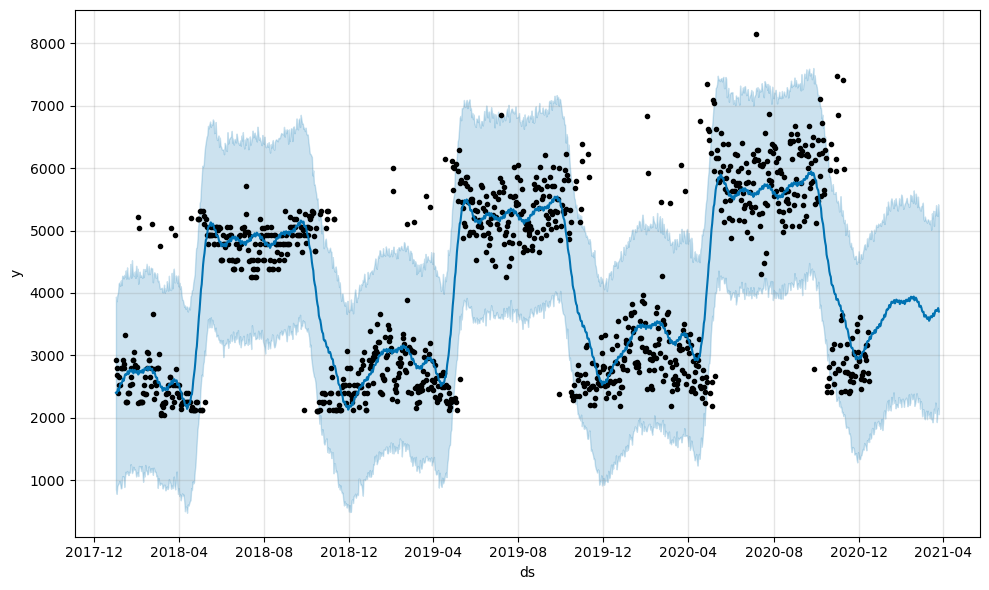

In [65]:
plot1=m.plot(forecast)

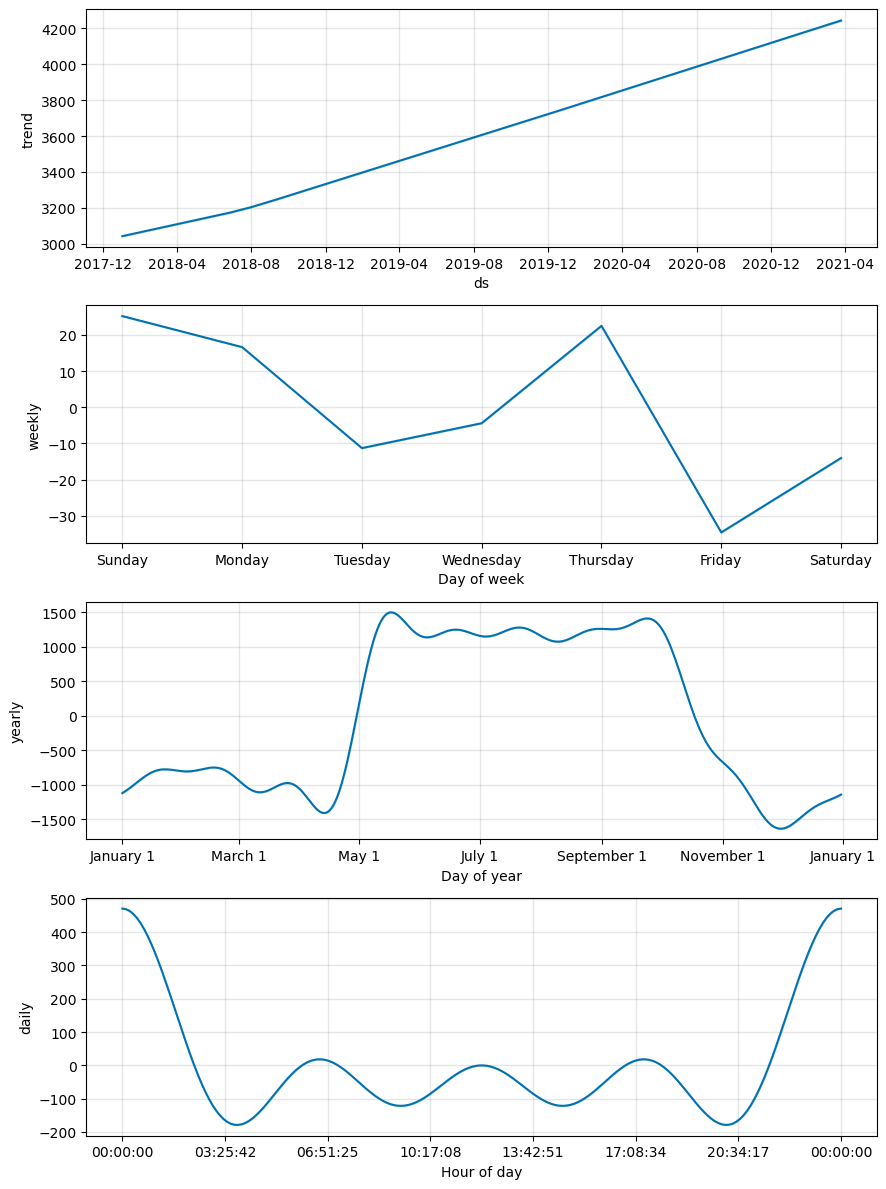

In [66]:
plot2 = m.plot_components(forecast)